import packages and define image

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

from skimage import exposure
from skimage.exposure import match_histograms

image = cv2.imread("../source/car.jpg")

1. Thay đổi định dạng ảnh

Read image

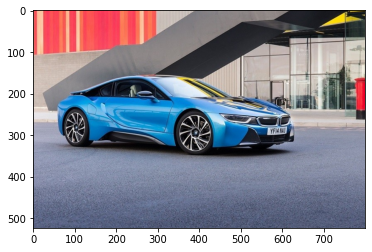

In [5]:
plt_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

Resize image

Before resize:  524 x 800
After resize:  160 x 104


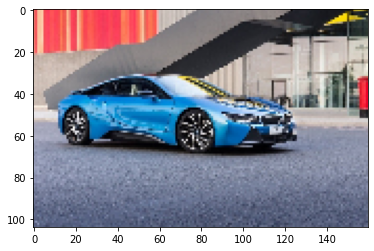

In [27]:
print("Before resize: ", image.shape[0], "x", image.shape[1])
width = int(image.shape[1] * 20 / 100)
height = int(image.shape[0] * 20 / 100)
dimension = (width, height)
resized_image = cv2.resize(image, dimension, cv2.INTER_CUBIC)
plt_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
print("After resize: ", width, "x", height)
plt.imshow(plt_image)

Chuyển đổi ảnh dương bản, âm bản

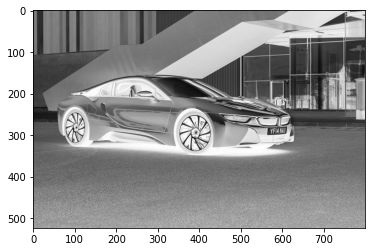

In [3]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
dst = cv2.bitwise_not(gray_image)
plt_image = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

Thay đối hệ màu và xử lý màu sắc

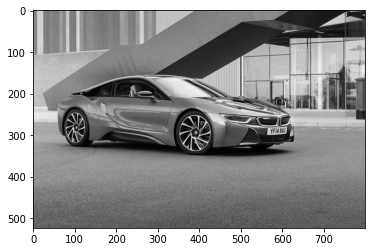

In [41]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
plt_image = cv2.cvtColor(src=gray_image, code=cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

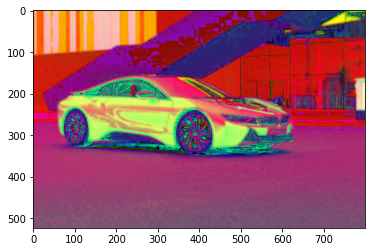

In [20]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2HSV)
plt_image = cv2.cvtColor(src=gray_image, code=cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

2. Tính và hiển thị biểu đồ mức xám

Hiển thị biểu đồ mức xám

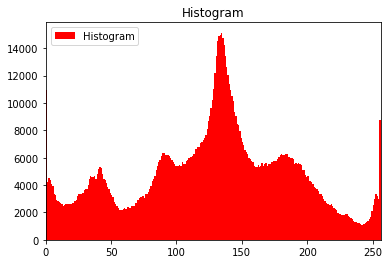

In [30]:
hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * float(hist.max()) / cdf.max()

# plt.plot(cdf_normalized, color='b')
plt.title("Histogram")
plt.hist(image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('Histogram', 'Histogram'), loc='upper left')

Cân bằng biểu đồ

(0.0, 256.0)

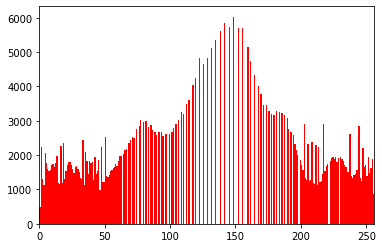

In [37]:
equalize_image = cv2.equalizeHist(gray_image)
plt.hist(equalize_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])

So khớp biểu đồ

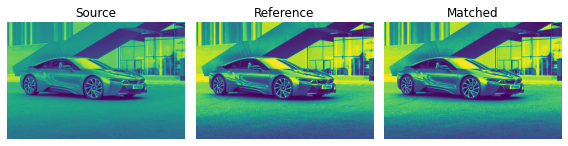

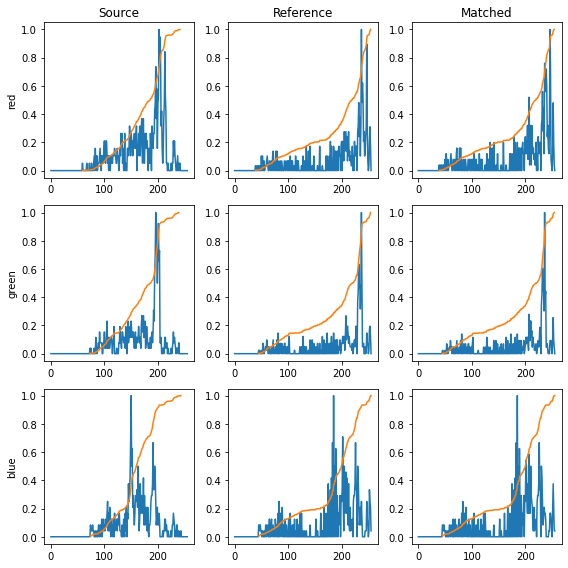

In [56]:
image = gray_image
reference = equalize_image

matched = match_histograms(image, reference , channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(8, 3),
                                    sharex=True, sharey=True)
  
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
  
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
  
for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], 
                                            source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)
  
axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')
  
plt.tight_layout()
plt.show()

3. Cải thiện độ tương phản

if x < alpha: y = 0 
else: y = ax (Hàm tuyến tính)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


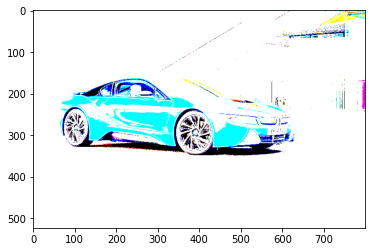

In [6]:
alpha = 20
a = 10

img_float32 = np.float32(image)
dst = img_float32
cond_list = [(dst < alpha), dst >= alpha]
func_list = [lambda dst: 0, lambda dst: a * dst]
dst = np.piecewise(dst, cond_list, func_list)

plt_image = cv2.cvtColor(src=dst, code=cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

Gamma change contrast (Gamma > 1, độ sáng tăng, Gamma < 1 độ sáng giảm) - (Hàm phi tuyến)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


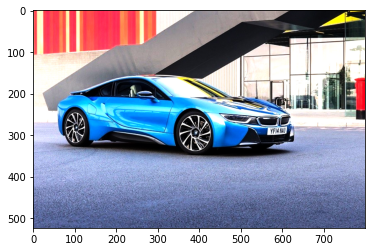

In [17]:
img_float32 = np.float32(image)
c = 0.1
gamma = 1.5
gamma_image = np.array((c * (img_float32) ** gamma)/255)
plt_image = cv2.cvtColor(gamma_image, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

4. Phép lọc trên miền không gian quan sát

Lọc tuyến tính bao gồm lọc thông thấp, homomorphic, nhân chập filter 

Lọc tuyến tính - Lọc thông thấp - Lọc trung bình - kernel = 1 / (width, height) * A[1 .. width, 1 .. height]

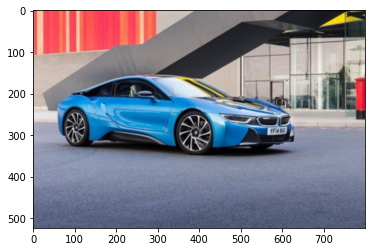

In [30]:
ksize = (3,3)
averaging_image = cv2.blur(src=image, ksize=ksize)

plt_image = cv2.cvtColor(averaging_image, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

Lọc tuyến tính - Lọc thông thấp - Lọc Gauss

(3, 7)


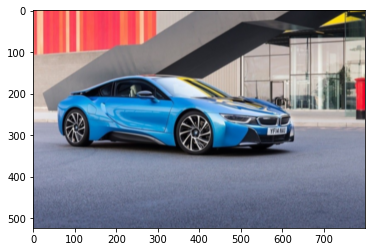

In [31]:
ksize = (3,7)
dst_gaussian = cv2.GaussianBlur(src=image, ksize=ksize, sigmaX=0, sigmaY=0)
print(ksize)
plt_image = cv2.cvtColor(dst_gaussian, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

Lọc thông cao - Sharpening filter (Lọc biên)

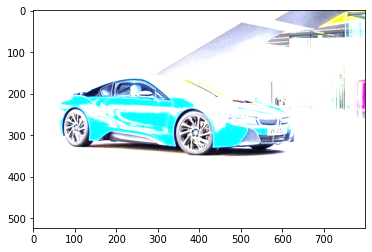

In [32]:
kernel = (3, 3)
dst_sharpen = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt_image = cv2.cvtColor(dst_sharpen, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

Lọc phi tuyến - Lọc trung vị

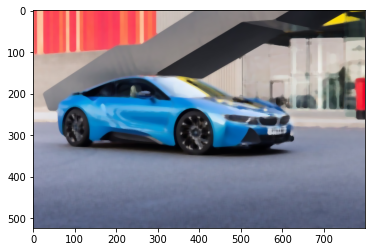

In [29]:
ksize = 9
dst_median = cv2.medianBlur(src=image, ksize=ksize)
plt_image = cv2.cvtColor(dst_median, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

5. Phép lọc Min (lọc co - erosion) / Max (lọc giãn - dilation), lọc đóng (co - giãn), lọc mở (giãn - co)

5.1. Đối với ảnh xám


Erosion Filter - Đối tượng bị co lại, nhỏ hơn so với đối tượng ban đầu

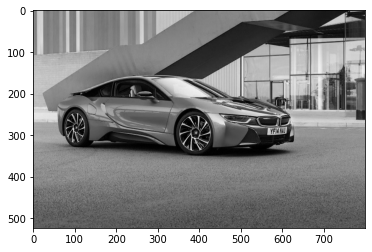

In [5]:
kernel = (3,3)
dst_erosion = cv2.erode(src=gray_image, kernel=kernel, iterations=1)

plt_image = cv2.cvtColor(dst_erosion, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

Dilation Filter - Đối tượng được giãn ra, to hơn so với đối tượng ban đầu

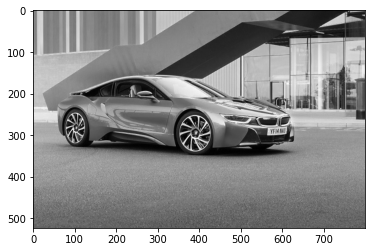

In [6]:
kernel = (3,3)
dst_dilate = cv2.dilate(src=gray_image, kernel=kernel, iterations=1)

plt_image = cv2.cvtColor(dst_dilate, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

Lọc đóng - Co đối tượng lại rồi giãn đối tượng ra

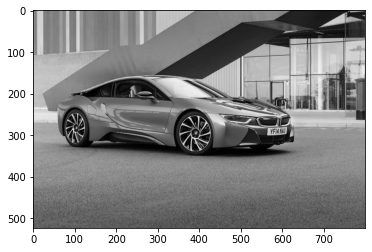

In [7]:
kernel = (3,3)
dst_erosion = cv2.erode(src=gray_image, kernel=kernel, iterations=1)
dst_dilate = cv2.dilate(src=dst_erosion, kernel=kernel, iterations=1)

open_image = cv2.cvtColor(dst_dilate, cv2.COLOR_BGR2RGB)
plt.imshow(open_image)

Lọc mở - Giãn đối tượng ra rồi co đối tượng lại

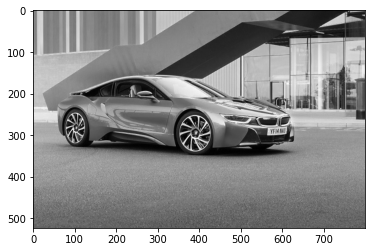

In [8]:
kernel = (3,3)
dst_dilate = cv2.dilate(src=gray_image, kernel=kernel, iterations=1)
dst_erosion = cv2.erode(src=dst_dilate, kernel=kernel, iterations=1)

close_image = cv2.cvtColor(dst_dilate, cv2.COLOR_BGR2RGB)
plt.imshow(close_image)

5.2. Đối với ảnh màu

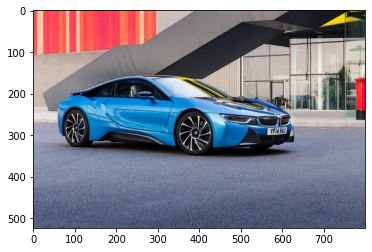

In [9]:
kernel = (3,3)
dst_erosion = cv2.erode(src=image, kernel=kernel, iterations=1)

plt_image = cv2.cvtColor(dst_erosion, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

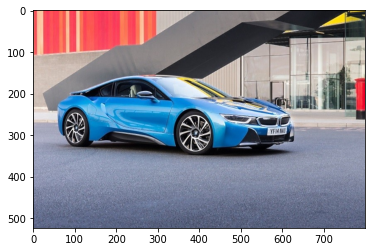

In [10]:
kernel = (3,3)
dst_dilate = cv2.dilate(src=image, kernel=kernel, iterations=1)

plt_image = cv2.cvtColor(dst_dilate, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)

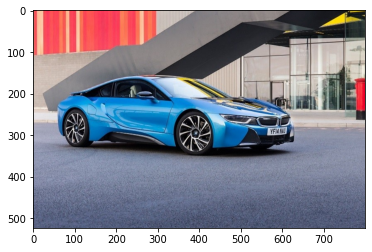

In [12]:
kernel = (3,3)
dst_erosion = cv2.erode(src=image, kernel=kernel, iterations=1)
dst_dilate = cv2.dilate(src=dst_erosion, kernel=kernel, iterations=1)

open_image = cv2.cvtColor(dst_dilate, cv2.COLOR_BGR2RGB)
plt.imshow(open_image)

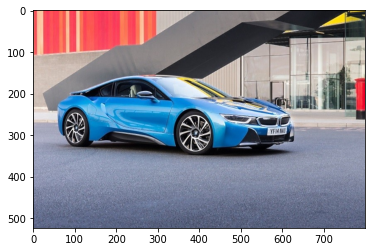

In [14]:
kernel = (3,3)
dst_dilate = cv2.dilate(src=image, kernel=kernel, iterations=1)
dst_erosion = cv2.erode(src=dst_dilate, kernel=kernel, iterations=1)

close_image = cv2.cvtColor(dst_dilate, cv2.COLOR_BGR2RGB)
plt.imshow(close_image)